# Lab 1
INFO 5871-001, Fall 2019

Just execute the cell below. It loads certain libraries that we are going to need.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Objective
Our objective in this lab is to look at the intersection of gender and class in the passengers on the Titanic.
What might we want to know?

## Data
What we can learn will partly be driven by the data that we have. So, first let's look at the data. Again, don't worry too much about what this code is doing, we'll learn more about these operations later.

In [2]:
titanic = pd.read_csv("titanic3.csv")

titanic.head()

pclass  survived                                             name     sex  \
0     1.0       1.0                    Allen, Miss. Elisabeth Walton  female   
1     1.0       1.0                   Allison, Master. Hudson Trevor    male   
2     1.0       0.0                     Allison, Miss. Helen Loraine  female   
3     1.0       0.0             Allison, Mr. Hudson Joshua Creighton    male   
4     1.0       0.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000    0.0    0.0   24160  211.3375       B5        S    2    NaN   
1   0.9167    1.0    2.0  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ / Chesterville, ON  
3  Montreal, PQ / Chesterville, ON  
4  Montreal, PQ / Chesterville, ON

The result of this operation is that we have a `DataFrame` stored in the variable `titanic` containing all of the data from the file.

## Questions
We can see that each observation is a passenger, we have information about what class of ticket the passenger bought, the age of the passenger, and the sex/gender. 

* What are our initial questions?

Note that the answer to initial questions will lead us to more questions -- hence "exploratory" data analysis.

### Question asked
What is the difference between survival of men and women on the Titanic?

Obviously, the column of `titanic` with the gender information is going to be important. A column from a `DataFrame` is called a `Series`.

In [3]:
titanic['sex']

0       female
1         male
2       female
3         male
4       female
5         male
6       female
7         male
8       female
9         male
10        male
11      female
12      female
13      female
14        male
15        male
16        male
17      female
18      female
19        male
20        male
21      female
22        male
23      female
24      female
25        male
26        male
27      female
28      female
29        male
         ...  
1280      male
1281      male
1282      male
1283      male
1284      male
1285      male
1286    female
1287      male
1288      male
1289      male
1290    female
1291      male
1292      male
1293      male
1294      male
1295      male
1296      male
1297      male
1298      male
1299      male
1300    female
1301      male
1302      male
1303      male
1304    female
1305    female
1306      male
1307      male
1308      male
1309       NaN
Name: sex, Length: 1310, dtype: object

Let's look at this troublesome row 1309 where the `sex` variable is undefined.

Note: We use `loc` to index because we are getting a row in a particular location in the data frame.

In [4]:
titanic.loc[1309]

pclass       NaN
survived     NaN
name         NaN
sex          NaN
age          NaN
sibsp        NaN
parch        NaN
ticket       NaN
fare         NaN
cabin        NaN
embarked     NaN
boat         NaN
body         NaN
home.dest    NaN
Name: 1309, dtype: object

We drop this row. Our first attempt to do this was 

```
titanic_new = titanic.dropna()
```

But this created an empty `DataFrame` because by default `dropna` removes rows with any missing data, and all the rows have some `NaN` values.

In [5]:
titanic_new = titanic.dropna(how='all')

Let's compare the original `DataFrame` with the filtered one. We see there is one row fewer.

In [6]:
titanic.shape

(1310, 14)

In [7]:
titanic_new.shape

(1309, 14)

Now let's compute the counts of the different values in the `sex` column.

In [8]:
full_table = pd.value_counts(titanic_new['sex'])
full_table

male      843
female    466
Name: sex, dtype: int64

Now we need to isolate the survivors. First we create a boolean index. This is a `Series` of boolean values: True if the individual survived and False if not.

In [9]:
survivors = titanic_new['survived']==1
survivors.head()

0     True
1     True
2    False
3    False
4    False
Name: survived, dtype: bool

Now we use the boolean index to extract only those rows with survivors.

Note: You might wonder how Pandas knows that when I say `titanic_new['survived']` I am referring to a column and when I say `titanic_new[survivors]` I am referring to particular rows. The answer is that the system uses `[]` differently when there is a indexing operation with labels (treated as references to columns) and when there is collection of values used as a collective index (treated as references to rows). Logically, these _should_ be different operations, but the creators of Pandas decided that collective indexing was so common that a simple operator should apply. Other systems, such as R, treat these two cases as different.

In [10]:
titanic_surv = titanic_new[survivors]
titanic_surv.head()

pclass  survived                                           name     sex  \
0     1.0       1.0                  Allen, Miss. Elisabeth Walton  female   
1     1.0       1.0                 Allison, Master. Hudson Trevor    male   
5     1.0       1.0                            Anderson, Mr. Harry    male   
6     1.0       1.0              Andrews, Miss. Kornelia Theodosia  female   
8     1.0       1.0  Appleton, Mrs. Edward Dale (Charlotte Lamson)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat  body  \
0  29.0000    0.0    0.0   24160  211.3375       B5        S    2   NaN   
1   0.9167    1.0    2.0  113781  151.5500  C22 C26        S   11   NaN   
5  48.0000    0.0    0.0   19952   26.5500      E12        S    3   NaN   
6  63.0000    1.0    0.0   13502   77.9583       D7        S   10   NaN   
8  53.0000    2.0    0.0   11769   51.4792     C101        S    D   NaN   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
5                     New York, NY  
6                       Hudson, NY  
8              Bayside, Queens, NY

We can see from this data frame that there were 500 survivors.

In [11]:
titanic_surv.shape

(500, 14)

Using `value_counts` again, we can compute the gender breakdown of the survivors and compare with the whole passenger population.

In [12]:
survivors_table = pd.value_counts(titanic_surv['sex'])
survivors_table

female    339
male      161
Name: sex, dtype: int64

In [13]:
full_table

male      843
female    466
Name: sex, dtype: int64

### The extras
Going beyond what we were able to do in class.

Let's put the two tables together into a new `DataFrame`.

In [14]:
survive_table = pd.DataFrame({'passengers': full_table, 'survivors': survivors_table})
survive_table

passengers  survivors
female         466        339
male           843        161

Now we can look at percentages. What was the chance of survival for female / male passengers?

Your first thought might be that we have extract the values and divide them, but Pandas makes this easy. We just divide the survivors column by the passengers column and it does the right thing.

In [15]:
survive_table['survivors'] / survive_table['passengers']

female    0.727468
male      0.190985
dtype: float64

That's a big difference: 19% vs 73%

Maybe the reason is that the male and female passengers were in different classes (parts of the ship). We can do value counts on `pclass` to find out, but first we need to create separate data frames from male and female passengers. This is similar to what we saw before, so I will compress the operation into a couple of lines.

In [16]:
males = titanic_new[titanic_new['sex']=='male']
females = titanic_new[titanic_new['sex']=='female']

With these data frames, we can now extract the break by class

In [17]:
pd.value_counts(males['pclass'])

3.0    493
1.0    179
2.0    171
Name: pclass, dtype: int64

In [18]:
pd.value_counts(females['pclass'])

3.0    216
1.0    144
2.0    106
Name: pclass, dtype: int64

Better as percentages

In [19]:
males_pct_class = pd.value_counts(males['pclass']) / len(males['pclass'])
males_pct_class

3.0    0.584816
1.0    0.212337
2.0    0.202847
Name: pclass, dtype: float64

In [20]:
females_pct_class = pd.value_counts(females['pclass']) / len(females['pclass'])
females_pct_class

3.0    0.463519
1.0    0.309013
2.0    0.227468
Name: pclass, dtype: float64

Let's plot these values to see them better. A bar plot with the passenger class on the x axis and percentages on the y axis.

Note that there is no column for the passenger class information: this is the `index` of the data frame. 

<BarContainer object of 3 artists>

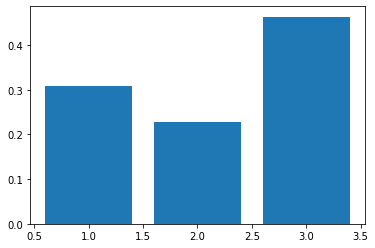

In [21]:
plt.bar(females_pct_class.index, females_pct_class)

<BarContainer object of 3 artists>

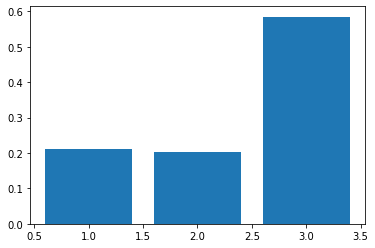

In [22]:
plt.bar(males_pct_class.index, males_pct_class)

Clearly a big difference in how these groups are distributed across the passenger classes.

It is also possible to put them together in one chart, but takes a little more work.

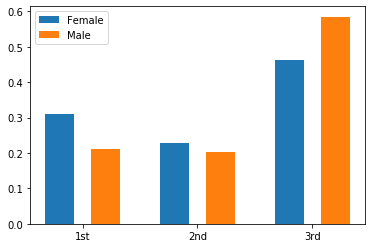

In [23]:
fig, ax = plt.subplots()
ax.bar(females_pct_class.index-0.2, females_pct_class, width=0.25, label="Female")
ax.bar(males_pct_class.index+0.2, males_pct_class, width=0.25, label="Male")

ax.set_xticks([1,2,3])
ax.set_xticklabels(['1st', '2nd', '3rd'])

ax.legend()

Survival as a function of passenger class

In [24]:
surv_by_class = pd.value_counts(titanic_surv['pclass'])
surv_by_class

1.0    200
3.0    181
2.0    119
Name: pclass, dtype: int64

In [25]:
all_by_class = pd.value_counts(titanic_new['pclass'])
all_by_class

3.0    709
1.0    323
2.0    277
Name: pclass, dtype: int64

All together in one table as before.

In [26]:
class_table = pd.DataFrame({'passengers': all_by_class, 'survivors': surv_by_class})
class_table

passengers  survivors
1.0         323        200
2.0         277        119
3.0         709        181

In [27]:
surv_pct_class = class_table['survivors'] / class_table['passengers']
surv_pct_class

1.0    0.619195
2.0    0.429603
3.0    0.255289
dtype: float64

<BarContainer object of 3 artists>

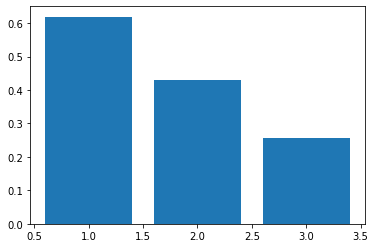

In [28]:
plt.bar(surv_pct_class.index, surv_pct_class)

And that's depressing, but maybe not surprising.

### Question for further contemplation
What would we have to do to answer the following question?

Were women more likely than men to survive in each passenger class? (Testing the "women" part of the "women and children" first concept.)